Hypothesis setting:
H0 hypothesis: Customers' opinions on the 4 different AI products, namely "Customer Relationship Management", "Healthcare Use",
"Self-driving Vehicle", and "Law Firm Related" and their general opinion on AI are the same.
Ha hypothesis: At least one of 5 customers' opinions on AI, namely "Customer Relationship Management", "Healthcare Use",
"Self-driving Vehicle", "Law Firm Related" and general opinion is different from the others.


Hypothesis testing & EDA

In [ ]:
''' We use a one-way ANOVA (Analysis of Variance) to test whether there are any statistically significant differences among the means of the ratings under the significance level 5% '''

' We use a one-way ANOVA (Analysis of Variance) to test whether there are any statistically significant differences among the means of the ratings under the significance level 5% '

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
survey_data = pd.read_excel('cleaned_survey_data.xlsx')
survey_data.head()

,id,start_time,end_time,country,age,sex,education,knowledge,general,customer_relationship,healthcare,self_driving_tech,law_firm
0,R_61tMjpSukwpRgjv,2024-01-11 16:33:00,2024-01-11 16:35:00,Netherlands,45-54 years old,Male,Bachelor,70,30,30,30,10,10
1,R_7HSxjZ2GexkiV3i,2024-01-11 17:32:00,2024-01-11 17:38:00,Germany,45-54 years old,Male,High school,70,60,30,50,10,70
2,R_3isziSLBLfJfQkd,2024-01-11 18:06:00,2024-01-11 18:08:00,Netherlands,25-34 years old,Female,Master,30,20,20,10,30,10
3,R_62FJuIqlKapBFak,2024-01-11 18:42:00,2024-01-11 18:43:00,Ireland,25-34 years old,Female,Bachelor,30,30,30,50,10,10
4,R_5cq02wjdQ1kiKF1,2024-01-11 19:32:00,2024-01-11 19:35:00,Netherlands,25-34 years old,Male,Bachelor,50,30,30,20,30,30


In [ ]:
#Statistics from the sample
survey_data.describe()

,knowledge,general,customer_relationship,healthcare,self_driving_tech,law_firm
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,48.586420,51.086420,53.703704,48.290123,44.141975,43.530864
std,23.513877,27.660631,28.785108,28.358767,28.908695,26.935205
min,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
25%,30.000000,30.000000,29.250000,22.000000,10.250000,15.500000
50%,50.000000,50.000000,55.500000,50.000000,40.000000,40.000000
75%,65.750000,71.500000,80.000000,70.000000,65.250000,60.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [ ]:
# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(survey_data['general'], survey_data['customer_relationship'], survey_data['healthcare'], survey_data['self_driving_tech'], survey_data['law_firm'])

# Evaluate the results
alpha = 0.05
print(f"F-statistic: {f_statistic}, p-value: {p_value}")
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference among group means.")
else:
    print("Fail to reject the null hypothesis. No significant difference among group means.")

F-statistic: 3.9325592796237743, p-value: 0.003609137552494191
Reject the null hypothesis. There is a significant difference among group means.


In [ ]:
'''Post Hoc Test (Tukey's Honestly Significant Difference)'''

"Post Hoc Test (Tukey's Honestly Significant Difference)"

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [ ]:
# Melt the DataFrame to the 'long' format for Tukey's HSD
melted_df = pd.melt(survey_data, value_vars=['general', 'customer_relationship', 'healthcare', 'self_driving_tech', 'law_firm'], var_name='Group', value_name='Value')


In [ ]:
# Perform Tukey's HSD test
tukey_result = pairwise_tukeyhsd(melted_df['Value'], melted_df['Group'])
print(tukey_result)


              Multiple Comparison of Means - Tukey HSD, FWER=0.05              
        group1              group2      meandiff p-adj   lower    upper  reject
-------------------------------------------------------------------------------
customer_relationship           general  -2.6173  0.919 -11.1653  5.9307  False
customer_relationship        healthcare  -5.4136 0.4151 -13.9616  3.1345  False
customer_relationship          law_firm -10.1728 0.0104 -18.7209 -1.6248   True
customer_relationship self_driving_tech  -9.5617 0.0195 -18.1098 -1.0137   True
              general        healthcare  -2.7963  0.899 -11.3443  5.7517  False
              general          law_firm  -7.5556 0.1119 -16.1036  0.9925  False
              general self_driving_tech  -6.9444 0.1729 -15.4925  1.6036  False
           healthcare          law_firm  -4.7593 0.5483 -13.3073  3.7888  False
           healthcare self_driving_tech  -4.1481 0.6746 -12.6962  4.3999  False
             law_firm self_driving_tech 

In [ ]:
#If the confidence interval does not include zero, it suggests a significant difference between the groups.
#A small p-value (typically < 0.05) suggests that I can reject the null hypothesis and infer a significant difference between the groups.
# Therefore, the ratings from customer_relationship and law_firm are significantly different, and it's the same between customer_relationship and self_driving_tech

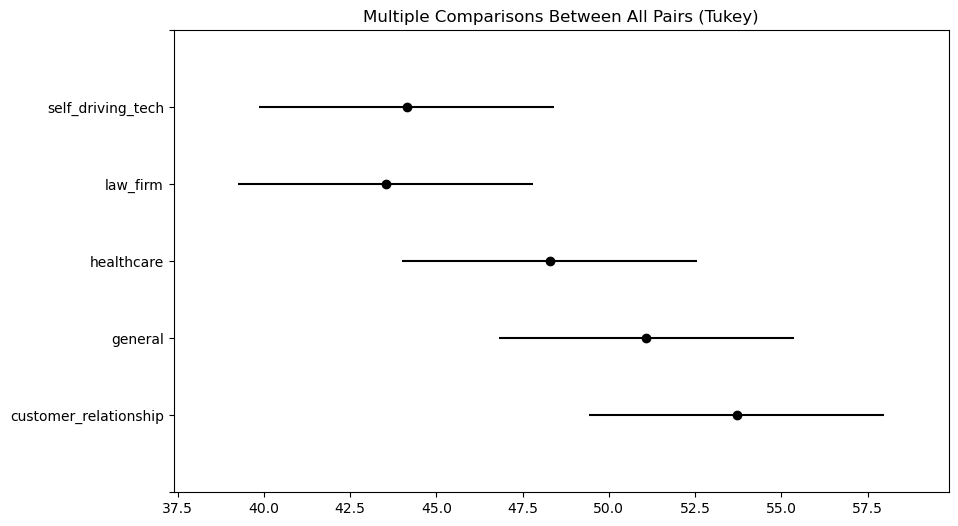

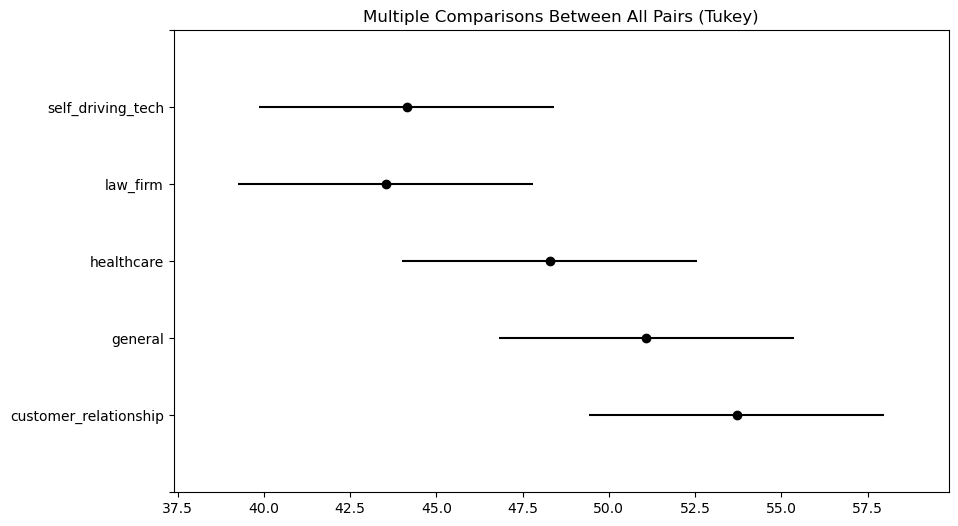

In [ ]:

# Plot Tukey's HSD results
tukey_result.plot_simultaneous()

In [ ]:
#In addition, rating of customer_relationship has higher mean than self_driving_tech and law_firm

In [ ]:
'''It would be nice to predict the public opinions on all 6 different categories, namely "knowledge", "general", "customer_relationship", "healthcare", "self_driving_tech" and "law_firm"'''

'It would be nice to predict the public opinions on all 6 different categories, namely "knowledge", "general", "customer_relationship", "healthcare", "self_driving_tech" and "law_firm"'

In [ ]:
#Because we don't know the population standard deviation, we will need to use T-distribution to calculate the confidence intervals under the confidence level 95%
import numpy as np
def rating_interval(data, name):
    interval = stats.t.interval(0.95, len(data)-1, loc=np.mean(data[name]), scale=stats.sem(data[name]))
    # Plot the data with error bars
    plt.errorbar(x=name, y=np.mean(data[name]), yerr=interval[1] - np.mean(data[name]), fmt='o')
    plt.xticks(rotation =45)
    # Annotate the error bar with the interval values
    annotation_text = f'CI: [{interval[0]:.1f}, {interval[1]:.1f}]'
    plt.annotate(annotation_text, xy=(name, np.mean(data[name])), xytext=(name, np.mean(data[name]) + 2.5),
                 ha='center', va='bottom', arrowprops=dict(facecolor='black', shrink=0.05))
    return {f"The estimated rating with 95% Confidence Level for {name} of the public is in the range": interval}



[{'The estimated rating with 95% Confidence Level for knowledge of the public is in the range': (44.93811056095711,
   52.23472894521573)},
 {'The estimated rating with 95% Confidence Level for general of the public is in the range': (46.79471861652086,
   55.378120889651974)},
 {'The estimated rating with 95% Confidence Level for customer_relationship of the public is in the range': (49.23753358654359,
   58.16987382086381)},
 {'The estimated rating with 95% Confidence Level for healthcare of the public is in the range': (43.890102633029684,
   52.69014428055057)},
 {'The estimated rating with 95% Confidence Level for self_driving_tech of the public is in the range': (39.65663008049801,
   48.62732053678594)},
 {'The estimated rating with 95% Confidence Level for law_firm of the public is in the range': (39.35171696879666,
   47.710011426265076)}]

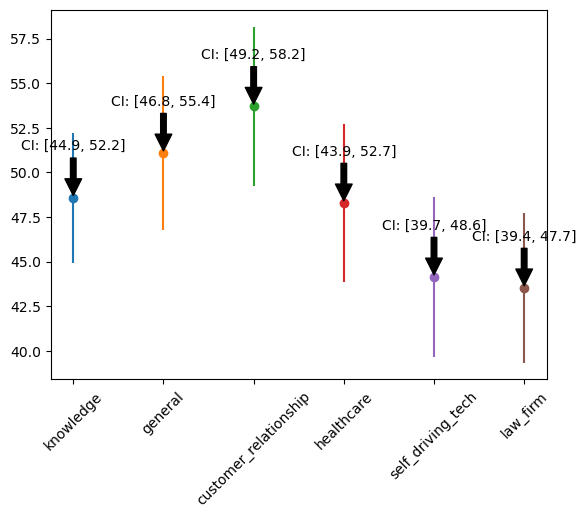

In [ ]:
intervals = []
for name in survey_data[["knowledge", "general", "customer_relationship", "healthcare", "self_driving_tech", "law_firm"]]:
    intervals.append(rating_interval(survey_data, name))
display(intervals)

In [ ]:
# With the confidence level 99%, the public opinions in the whole population:
'''{'The predicted rating with 95% Confidence level for knowledge of the public is in the range': (44.93811056095711,
   52.23472894521573)},
 {'The predicted rating with 95% Confidence level for general of the public is in the range': (46.79471861652086,
   55.378120889651974)},
 {'The predicted rating with 95% Confidence level for customer_relationship of the public is in the range': (49.23753358654359,
   58.16987382086381)},
 {'The predicted rating with 95% Confidence level for healthcare of the public is in the range': (43.890102633029684,
   52.69014428055057)},
 {'The predicted rating with 95% Confidence level for self_driving_tech of the public is in the range': (39.65663008049801,
   48.62732053678594)},
 {'The predicted rating with 95% Confidence level for law_firm of the public is in the range': (39.35171696879666,
   47.710011426265076)}'''

# The public believe they know a moderate amount of knowledge about AI
# The public's willingness of using AI to resolve practical issues is in a moderate amount
# The public are more likely to use AI for the purpose of Customer Relationship Management
# The public are less likely to use AI for Self-Driving Vehicle and Law Firm

"{'The predicted rating with 95% Confidence level for knowledge of the public is in the range': (44.93811056095711,\n   52.23472894521573)},\n {'The predicted rating with 95% Confidence level for general of the public is in the range': (46.79471861652086,\n   55.378120889651974)},\n {'The predicted rating with 95% Confidence level for customer_relationship of the public is in the range': (49.23753358654359,\n   58.16987382086381)},\n {'The predicted rating with 95% Confidence level for healthcare of the public is in the range': (43.890102633029684,\n   52.69014428055057)},\n {'The predicted rating with 95% Confidence level for self_driving_tech of the public is in the range': (39.65663008049801,\n   48.62732053678594)},\n {'The predicted rating with 95% Confidence level for law_firm of the public is in the range': (39.35171696879666,\n   47.710011426265076)}"

EDA

In [ ]:
# Check unique values for country, age, sex, and education
display(survey_data['country'].value_counts())
display(survey_data['age'].value_counts())
display(survey_data['sex'].value_counts())
display(survey_data['education'].value_counts())

United States of America                                93
China                                                   33
Netherlands                                             10
United Kingdom of Great Britain and Northern Ireland     6
Germany                                                  5
Ireland                                                  4
Belgium                                                  2
Italy                                                    2
Norway                                                   1
South Africa                                             1
Australia                                                1
Switzerland                                              1
Spain                                                    1
Brazil                                                   1
Austria                                                  1
Name: country, dtype: int64

25-34 years old    64
35-44 years old    34
18-24 years old    31
45-54 years old    19
55-64 years old     6
65+ years old       5
Under 18            3
Name: age, dtype: int64

Female      95
Male        66
Intersex     1
Name: sex, dtype: int64

Bachelor            65
Master              44
High school         43
Doctor and above    10
Name: education, dtype: int64

In [ ]:
'''To make sure that EDA can be done with representative data, the following plotting will only take consideration of the categorical data with more than 30 records.
Therefore, when the EDA is about Age, only the 3 groups are being analyzed. Namely, "18-24 years old", "25-34 years old", and "35-44 years old".
When it's about Sex, only Female and Male are taken into the analysis.
When it's about Education, only "High school", "Bachelor" and "Master" are being used.
'''

'To make sure that the inferential analysis can be done with representative data, the following plotting will only take consideration of the categorical data with more than 30 records.\nTherefore, when the EDA is about Age, only the 3 groups are being analyzed. Namely, "18-24 years old", "25-34 years old", and "35-44 years old".\nWhen it\'s about Sex, only Female and Male are taken into the analysis.\nWhen it\'s about Education, only "High school", "Bachelor" and "Master" are being used.\n'

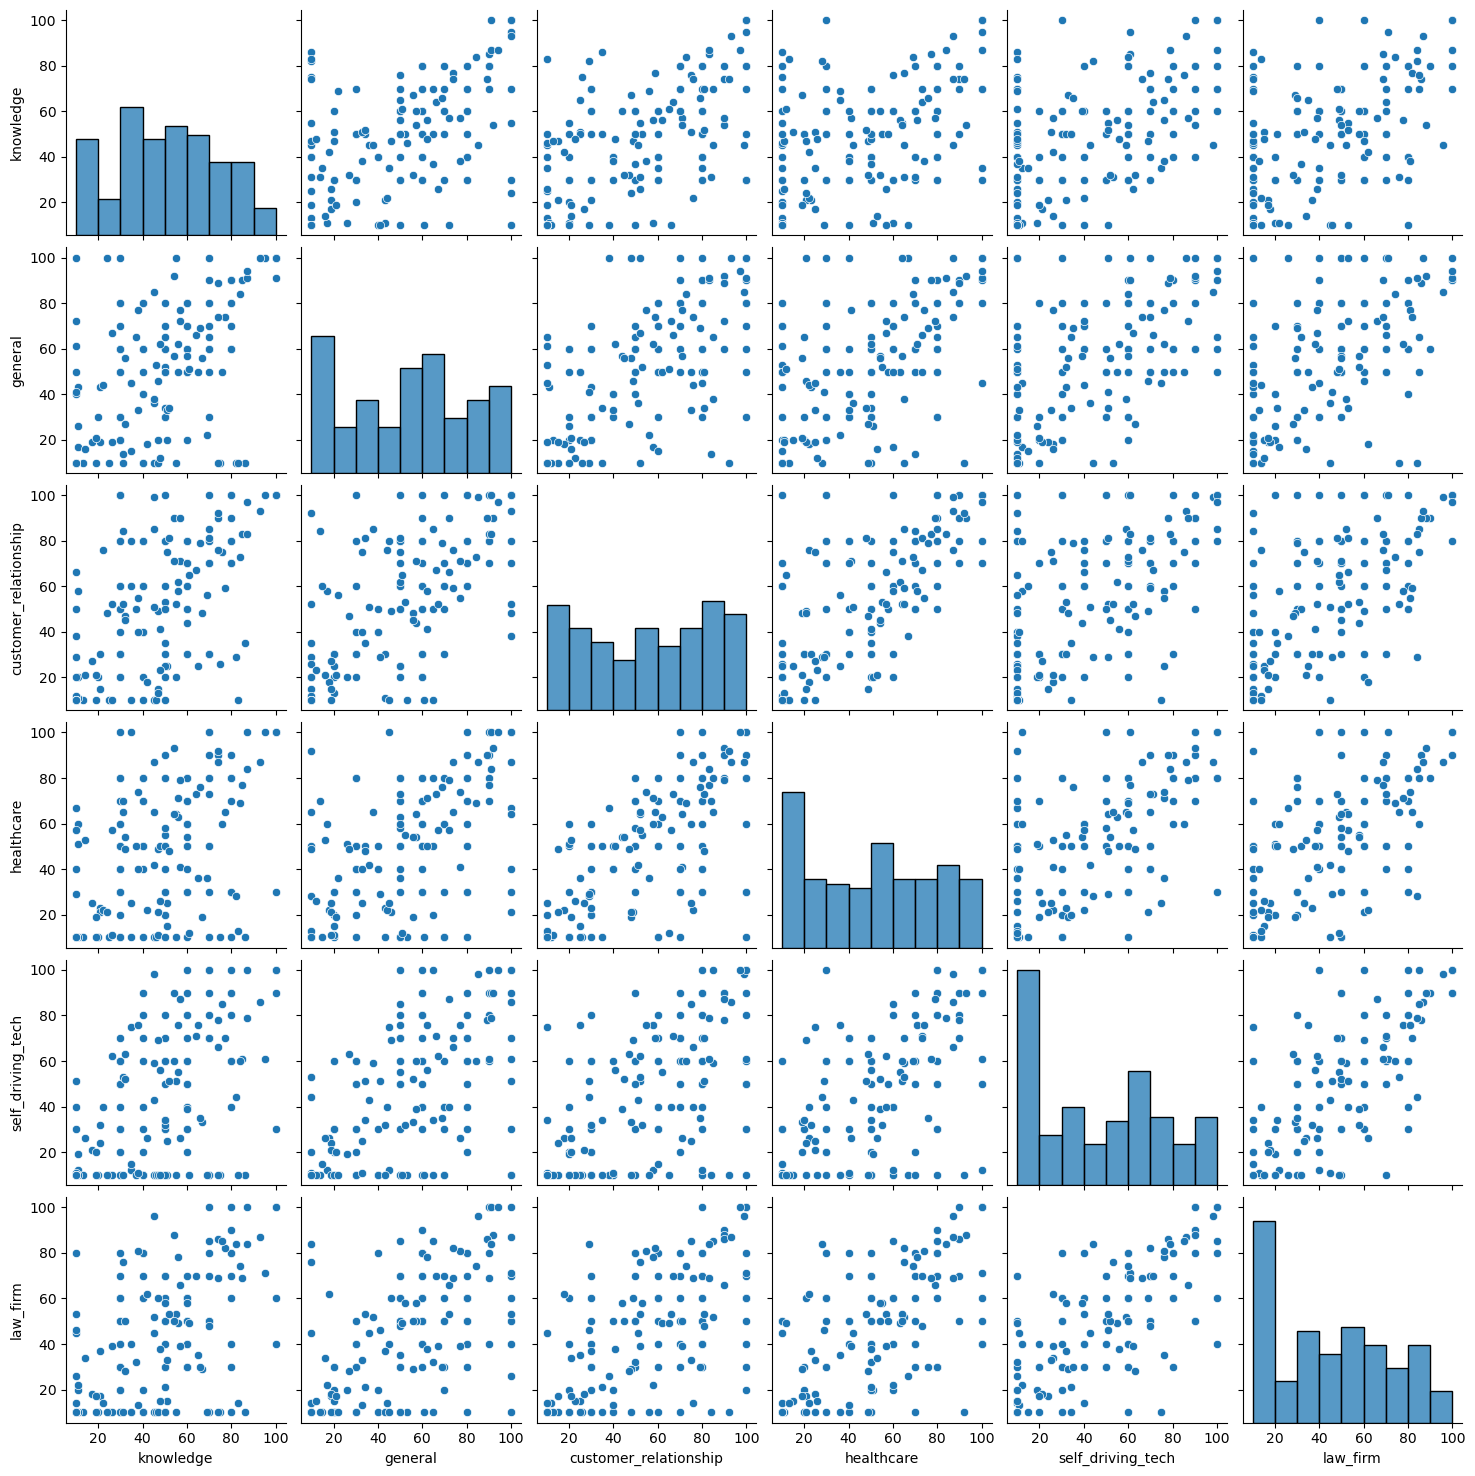

In [ ]:
# Check if there's some patterns among the numeric data columns
sns.pairplot(data=survey_data)

In [ ]:
survey_data.corr()

C:\Users\ruoxi\AppData\Local\Temp\ipykernel_7440\2594744309.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  survey_data.corr()


,knowledge,general,customer_relationship,healthcare,self_driving_tech,law_firm
knowledge,1.000000,0.495740,0.537530,0.437742,0.494327,0.480698
general,0.495740,1.000000,0.658139,0.599254,0.613380,0.631423
customer_relationship,0.537530,0.658139,1.000000,0.729924,0.621415,0.635443
healthcare,0.437742,0.599254,0.729924,1.000000,0.643437,0.642667
self_driving_tech,0.494327,0.613380,0.621415,0.643437,1.000000,0.774699
law_firm,0.480698,0.631423,0.635443,0.642667,0.774699,1.000000


C:\Users\ruoxi\AppData\Local\Temp\ipykernel_7440\1655002744.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(survey_data.corr())
C:\Users\ruoxi\AppData\Local\Temp\ipykernel_7440\1655002744.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.xticks(range(6),survey_data.corr().columns,rotation=90)
C:\Users\ruoxi\AppData\Local\Temp\ipykernel_7440\1655002744.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.yticks(range(6),survey_data.corr().columns)


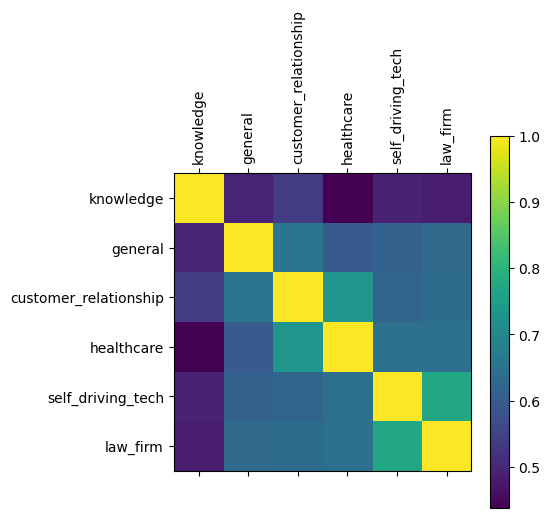

In [ ]:

plt.matshow(survey_data.corr())
plt.xticks(range(6),survey_data.corr().columns,rotation=90)
plt.yticks(range(6),survey_data.corr().columns)
plt.colorbar()
plt.show()

In [ ]:
#knowledge does not seem to have very strong correlation with any of the ratings
#rating of customer_relationship seems to have a high correlation with healthcare
#rating of self_driving seems to have a high correlation with law_firm


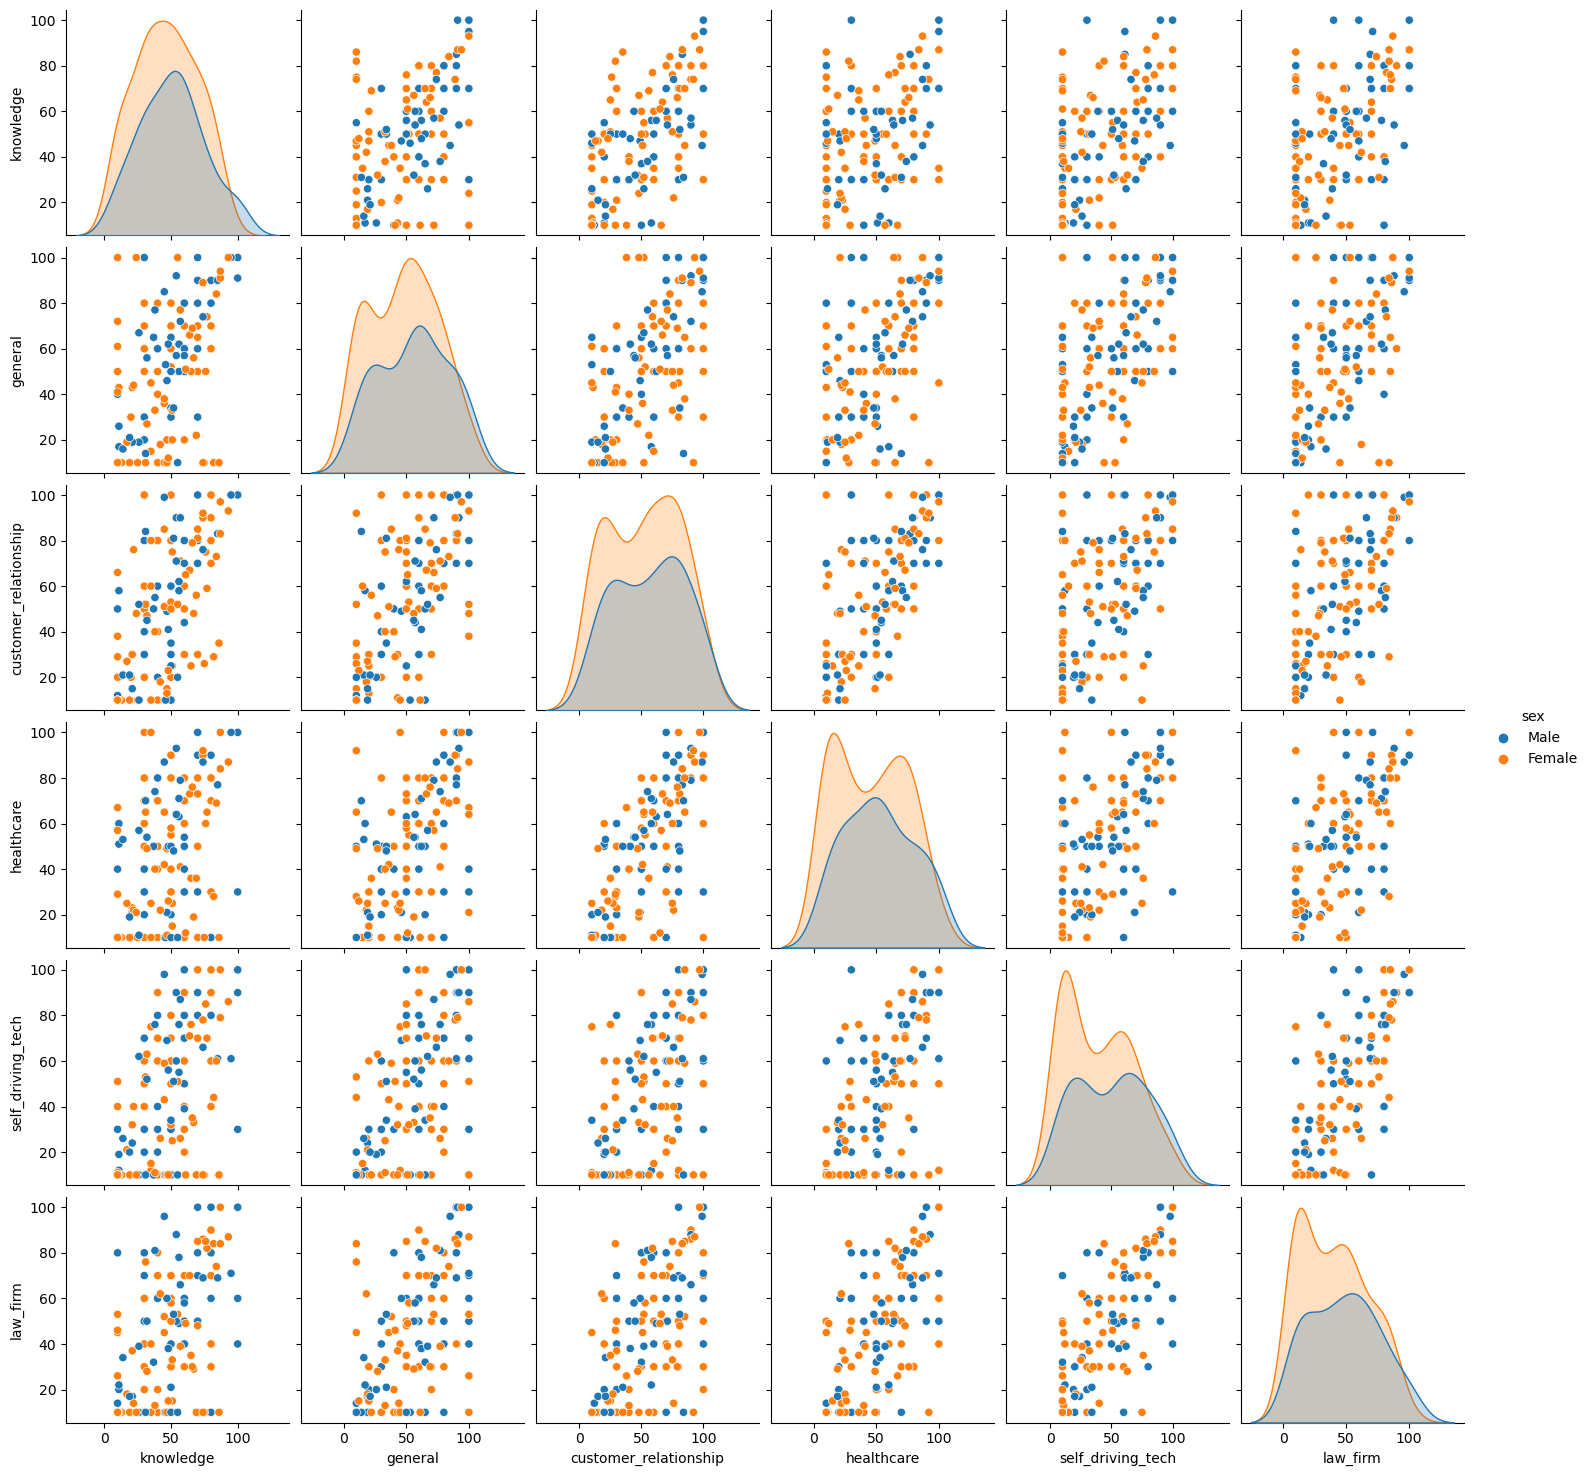

In [ ]:
#what if we add a categorical value "sex" without "Intersex"
sns.pairplot(data=survey_data[survey_data['sex']!="Intersex"], hue='sex')

In [ ]:
#In terms of healthcare, male has the tendency of being neutral, and femal shows the tendency of either holding slightly negative  or  slightly positive opinion, but not in the middel position
#In terms of self_driving_tech and law_firm, female has the tendency of holding negative opinion


Text(0.5, 1.0, 'IQR of Law Firm VS Sex')

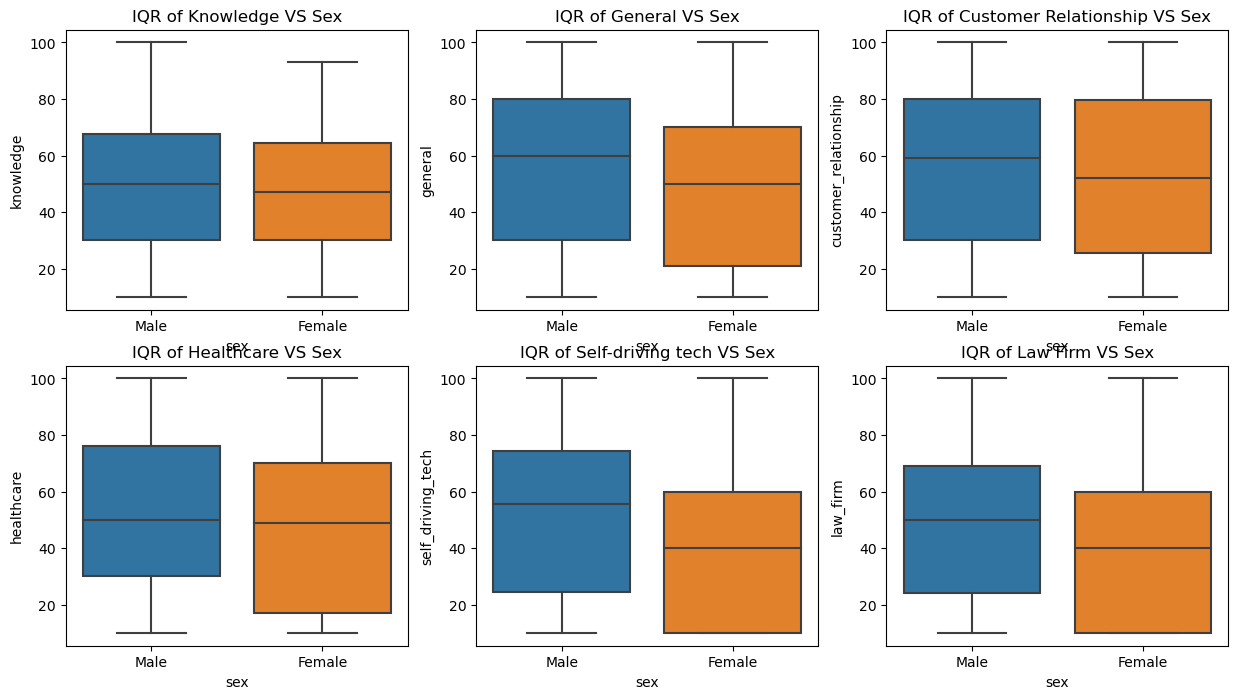

In [ ]:
# Let's see if the central ratings are different in sex group without "Intersex"
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
plt.sca(axes[0,0])
sns.boxplot(data=survey_data[survey_data['sex']!="Intersex"], x='sex', y='knowledge')
plt.title('IQR of Knowledge VS Sex')
plt.sca(axes[0,1])
sns.boxplot(data=survey_data[survey_data['sex']!="Intersex"], x='sex', y='general')
plt.title('IQR of General VS Sex')
plt.sca(axes[0,2])
sns.boxplot(data=survey_data[survey_data['sex']!="Intersex"], x='sex', y='customer_relationship')
plt.title('IQR of Customer Relationship VS Sex')
plt.sca(axes[1,0])
sns.boxplot(data=survey_data[survey_data['sex']!="Intersex"], x='sex', y='healthcare')
plt.title('IQR of Healthcare VS Sex')
plt.sca(axes[1,1])
sns.boxplot(data=survey_data[survey_data['sex']!="Intersex"], x='sex', y='self_driving_tech')
plt.title('IQR of Self-driving tech VS Sex')
plt.sca(axes[1,2])
sns.boxplot(data=survey_data[survey_data['sex']!="Intersex"], x='sex', y='law_firm')
plt.title('IQR of Law Firm VS Sex')

In [ ]:
# For both male and female, the majority are having a moderate amount of knowledge about AI
# Male has a higher tendency of using AI for all 5 scenarios
# Both male and female show a positive opinion on AI made for customer relationship management
# For self_driving_tech and law_firm, female has a very high tendency of holding negative opinions

Text(0.5, 1.0, 'IQR of Law Firm VS Education')

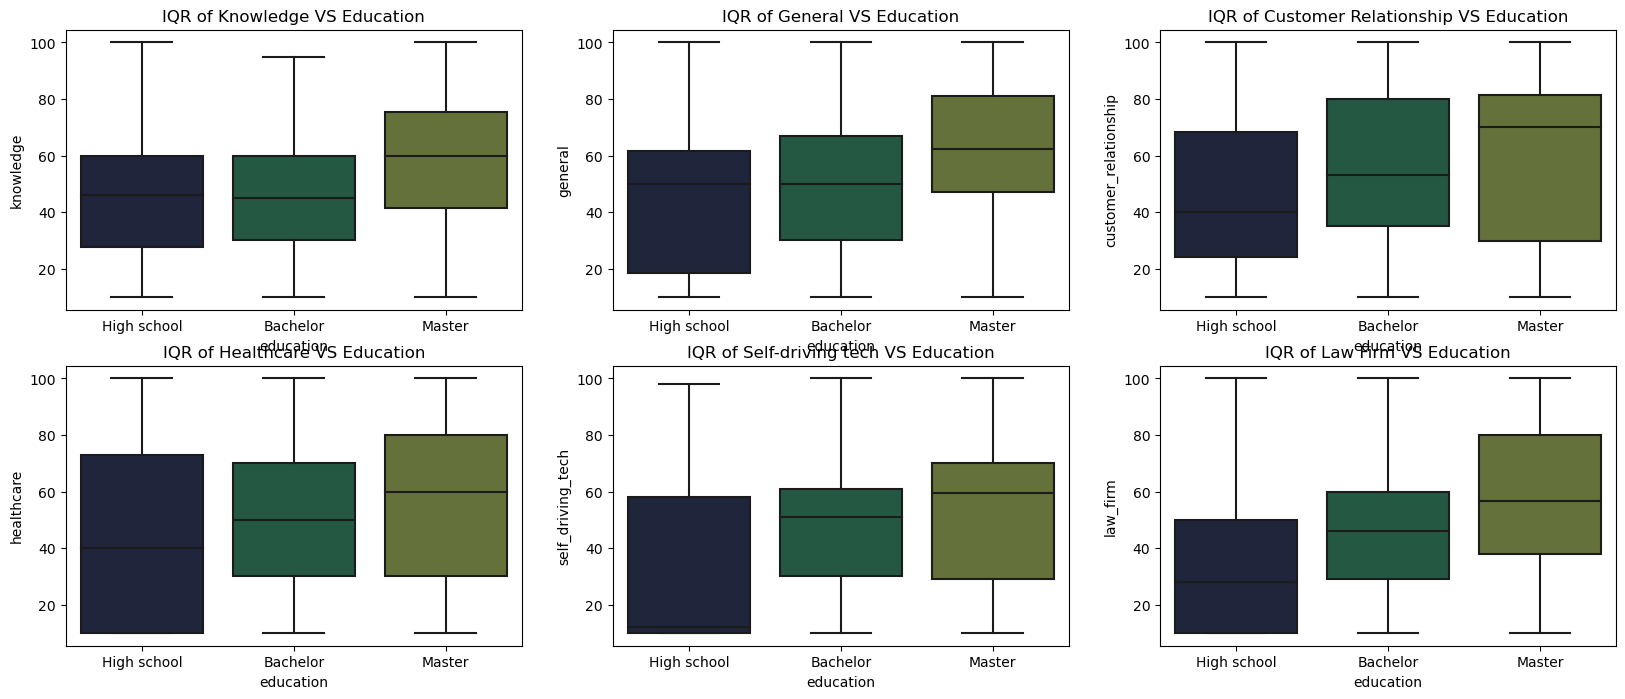

In [ ]:
#we do the same boxplot comparison for education without "Doctor and above"
sns.set_palette("cubehelix")
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 8))
custom_order = ["High school", "Bachelor", "Master"]
plt.sca(axes[0,0])
sns.boxplot(data=survey_data[survey_data['education']!="Doctor and above"], x='education', y='knowledge', order=custom_order)
plt.title('IQR of Knowledge VS Education')
plt.sca(axes[0,1])
sns.boxplot(data=survey_data[survey_data['education']!="Doctor and above"], x='education', y='general', order=custom_order)
plt.title('IQR of General VS Education')
plt.sca(axes[0,2])
sns.boxplot(data=survey_data[survey_data['education']!="Doctor and above"], x='education', y='customer_relationship', order=custom_order)
plt.title('IQR of Customer Relationship VS Education')
plt.sca(axes[1,0])
sns.boxplot(data=survey_data[survey_data['education']!="Doctor and above"], x='education', y='healthcare', order=custom_order)
plt.title('IQR of Healthcare VS Education')
plt.sca(axes[1,1])
sns.boxplot(data=survey_data[survey_data['education']!="Doctor and above"], x='education', y='self_driving_tech', order=custom_order)
plt.title('IQR of Self-driving tech VS Education')
plt.sca(axes[1,2])
sns.boxplot(data=survey_data[survey_data['education']!="Doctor and above"], x='education', y='law_firm', order=custom_order)
plt.title('IQR of Law Firm VS Education')


In [ ]:

# Out of the 3 education levels, respondents with a Master degree believe they have higher knowledge on AI, and the other two do not have a big difference.
# Out of the 3 education levels, the higher the education level is, the more likely the respondent is to use AI in all 5 scenarios.


Text(0.5, 1.0, 'IQR of Law Firm VS Age')

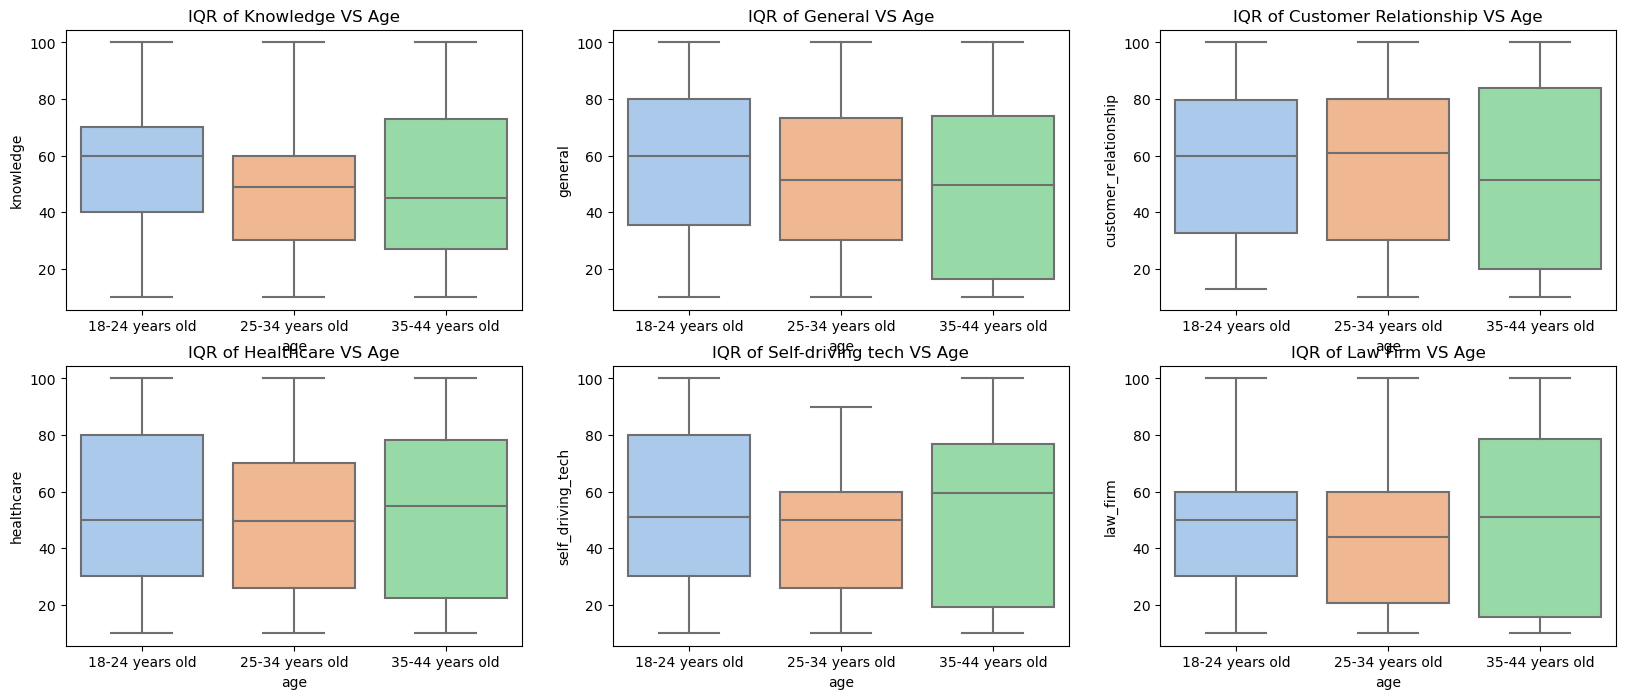

In [ ]:
#we do the same boxplot comparison for age with only "18-24 years old", "25-34 years old", and "35-44 years old"
sns.set_palette("pastel")
custom_order = ["18-24 years old", "25-34 years old", "35-44 years old"]
selected_age_groups = ["18-24 years old", "25-34 years old", "35-44 years old"]
selected_age_data = survey_data[survey_data['age'].isin(selected_age_groups)]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 8))
plt.sca(axes[0,0])
sns.boxplot(data=selected_age_data, x='age', y='knowledge', order = custom_order)
plt.title('IQR of Knowledge VS Age')
plt.sca(axes[0,1])
sns.boxplot(data=selected_age_data, x='age', y='general', order = custom_order)
plt.title('IQR of General VS Age')
plt.sca(axes[0,2])
sns.boxplot(data=selected_age_data, x='age', y='customer_relationship', order = custom_order)
plt.title('IQR of Customer Relationship VS Age')
plt.sca(axes[1,0])
sns.boxplot(data=selected_age_data, x='age', y='healthcare', order = custom_order)
plt.title('IQR of Healthcare VS Age')
plt.sca(axes[1,1])
sns.boxplot(data=selected_age_data, x='age', y='self_driving_tech', order = custom_order)
plt.title('IQR of Self-driving tech VS Age')
plt.sca(axes[1,2])
sns.boxplot(data=selected_age_data, x='age', y='law_firm', order = custom_order)
plt.title('IQR of Law Firm VS Age')

In [ ]:
# Respondents from 35-44 years old are having more diverse ratings all over the 6 categories
# The younger the respondent is, the more knowledge he/she believes to have, and the more likely he/she uses AI in general to resolve the practical issues
# Respondents from 25-34 years old are comparatively more clustered in the middel
# Respondents from 18-24 years old are are more positive about AI disigned for other 3 AIs than AI made for Law firms 
# Respondents from 35-44 years old are less positive about AI designed for Customer Relationship management
# In general, respondents are less positive about AI designed for Law firms


In [ ]:
#Let's see if country make any difference
# Let's make use of the "country" by binning the european countries into "Europe"
EMEA_list = ["Netherlands", "United Kingdom of Great Britain and Northern Ireland", "Germany", "Ireland", "Belgium", "Italy", "Norway", "Switzerland", "Spain", "Austria"]
America_list = ["Brazil", "United States of America"]
def area(value):
    if value in EMEA_list:
        return "EMEA"
    elif value in America_list:
        return "America"
    else:
        return "China and ROW"

survey_data['area'] = survey_data['country'].apply(area)

In [ ]:
survey_data.head()

,id,start_time,end_time,country,age,sex,education,knowledge,general,customer_relationship,healthcare,self_driving_tech,law_firm,area
0,R_61tMjpSukwpRgjv,2024-01-11 16:33:00,2024-01-11 16:35:00,Netherlands,45-54 years old,Male,Bachelor,70,30,30,30,10,10,EMEA
1,R_7HSxjZ2GexkiV3i,2024-01-11 17:32:00,2024-01-11 17:38:00,Germany,45-54 years old,Male,High school,70,60,30,50,10,70,EMEA
2,R_3isziSLBLfJfQkd,2024-01-11 18:06:00,2024-01-11 18:08:00,Netherlands,25-34 years old,Female,Master,30,20,20,10,30,10,EMEA
3,R_62FJuIqlKapBFak,2024-01-11 18:42:00,2024-01-11 18:43:00,Ireland,25-34 years old,Female,Bachelor,30,30,30,50,10,10,EMEA
4,R_5cq02wjdQ1kiKF1,2024-01-11 19:32:00,2024-01-11 19:35:00,Netherlands,25-34 years old,Male,Bachelor,50,30,30,20,30,30,EMEA


In [ ]:
survey_data['area']

0         EMEA
1         EMEA
2         EMEA
3         EMEA
4         EMEA
        ...   
157    America
158    America
159    America
160    America
161    America
Name: area, Length: 162, dtype: object

Text(0.5, 1.0, 'IQR of Law Firm VS Area')

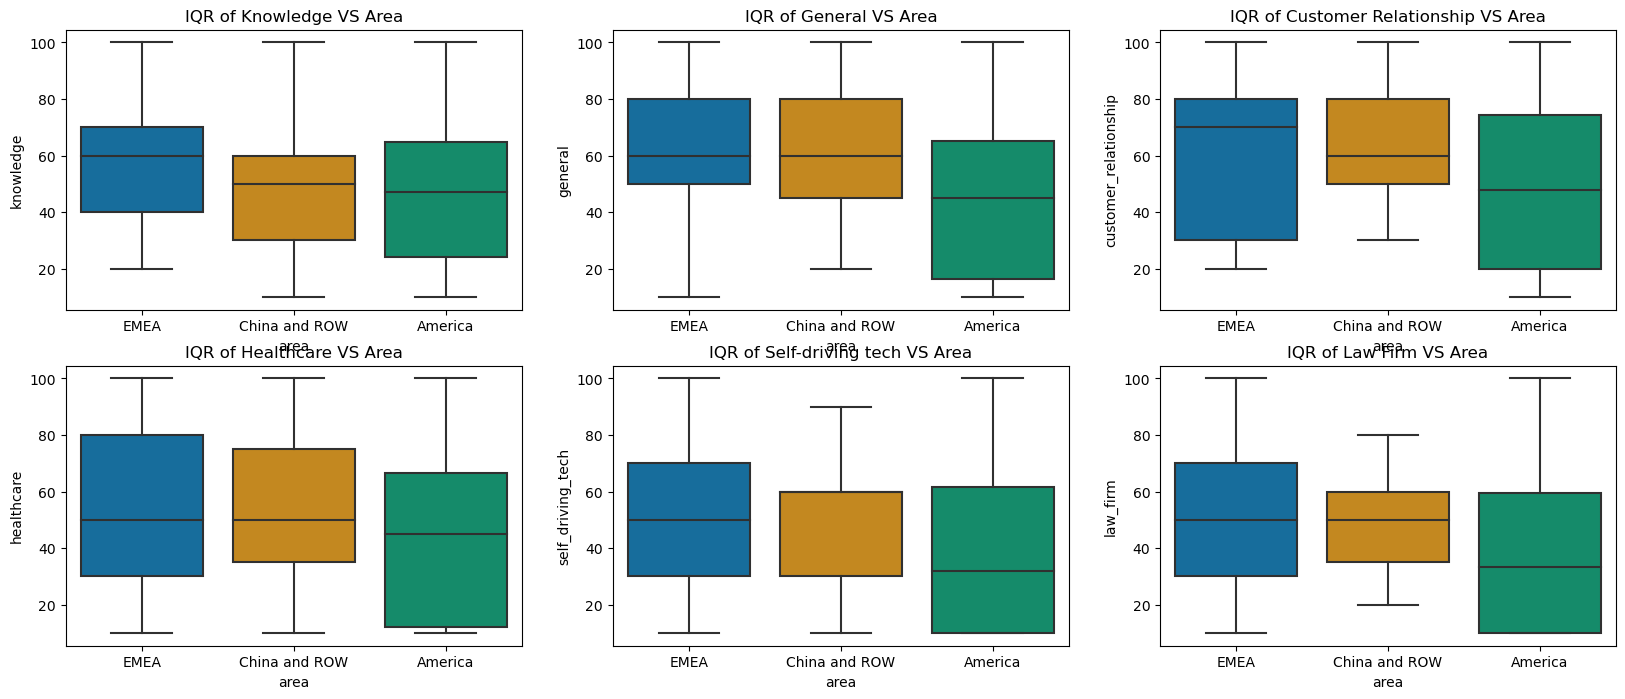

In [ ]:
#we do the same boxplot comparison for areas
sns.set_palette("colorblind")
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 8))
plt.sca(axes[0,0])
sns.boxplot(data=survey_data, x='area', y='knowledge')
plt.title('IQR of Knowledge VS Area')
plt.sca(axes[0,1])
sns.boxplot(data=survey_data, x='area', y='general')
plt.title('IQR of General VS Area')
plt.sca(axes[0,2])
sns.boxplot(data=survey_data, x='area', y='customer_relationship')
plt.title('IQR of Customer Relationship VS Area')
plt.sca(axes[1,0])
sns.boxplot(data=survey_data, x='area', y='healthcare')
plt.title('IQR of Healthcare VS Area')
plt.sca(axes[1,1])
sns.boxplot(data=survey_data, x='area', y='self_driving_tech')
plt.title('IQR of Self-driving tech VS Area')
plt.sca(axes[1,2])
sns.boxplot(data=survey_data, x='area', y='law_firm')
plt.title('IQR of Law Firm VS Area')

In [ ]:
'''Because we can see that the demographic variables do show different preferences on the 5 different AIs, we will see if we can build a model to predict the preference.'''

'Because we can see that the demographic variables do show different preferences on the 5 different AIs, we will see if we can build a model to predict the preference.'

In [ ]:
# The ratings of the 5 AIs are transformed into 2 categorical values: rating<=55 unlikely, rating > 55 likely
def cat_rating(value):
    if value <= 55:
        return "unlikely"
    else:
        return "likely"

In [ ]:

for name in ['general', 'customer_relationship', 'healthcare', 'self_driving_tech', 'law_firm']:
    survey_data[f'cat_{name}'] = survey_data[name].apply(cat_rating)

In [ ]:
survey_data.head()

,id,start_time,end_time,country,age,sex,education,knowledge,general,customer_relationship,healthcare,self_driving_tech,law_firm,area,cat_general,cat_customer_relationship,cat_healthcare,cat_self_driving_tech,cat_law_firm
0,R_61tMjpSukwpRgjv,2024-01-11 16:33:00,2024-01-11 16:35:00,Netherlands,45-54 years old,Male,Bachelor,70,30,30,30,10,10,EMEA,unlikely,unlikely,unlikely,unlikely,unlikely
1,R_7HSxjZ2GexkiV3i,2024-01-11 17:32:00,2024-01-11 17:38:00,Germany,45-54 years old,Male,High school,70,60,30,50,10,70,EMEA,likely,unlikely,unlikely,unlikely,likely
2,R_3isziSLBLfJfQkd,2024-01-11 18:06:00,2024-01-11 18:08:00,Netherlands,25-34 years old,Female,Master,30,20,20,10,30,10,EMEA,unlikely,unlikely,unlikely,unlikely,unlikely
3,R_62FJuIqlKapBFak,2024-01-11 18:42:00,2024-01-11 18:43:00,Ireland,25-34 years old,Female,Bachelor,30,30,30,50,10,10,EMEA,unlikely,unlikely,unlikely,unlikely,unlikely
4,R_5cq02wjdQ1kiKF1,2024-01-11 19:32:00,2024-01-11 19:35:00,Netherlands,25-34 years old,Male,Bachelor,50,30,30,20,30,30,EMEA,unlikely,unlikely,unlikely,unlikely,unlikely


In [ ]:
survey_data_copy = survey_data.copy()

In [ ]:
# Only keep the data from "18-24 years old", "25-34 years old"& "35-44 years old"(age), "female"&"male"(sex), "High school", "Bachelor"& "Master"(education)
survey_data_copy = survey_data_copy[survey_data_copy['age'].isin(["18-24 years old", "25-34 years old", "35-44 years old"])]
survey_data_copy = survey_data_copy[survey_data_copy['sex'].isin(['Male', 'Female'])]
survey_data_copy = survey_data_copy[survey_data_copy['education'].isin(["High school", "Bachelor", "Master"])]

In [ ]:
survey_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 2 to 161
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id                         120 non-null    object        
 1   start_time                 120 non-null    datetime64[ns]
 2   end_time                   120 non-null    datetime64[ns]
 3   country                    120 non-null    object        
 4   age                        120 non-null    object        
 5   sex                        120 non-null    object        
 6   education                  120 non-null    object        
 7   knowledge                  120 non-null    int64         
 8   general                    120 non-null    int64         
 9   customer_relationship      120 non-null    int64         
 10  healthcare                 120 non-null    int64         
 11  self_driving_tech          120 non-null    int64         
 12  law_firm

In [ ]:
#Drop the columns "start_time", "end_time", "country", "knowledge", "general", 'customer_relationship', 'healthcare', 'self_driving_tech', 'law_firm'
survey_data_copy.drop(columns=['id', "start_time", "end_time", "country", "knowledge"],inplace=True)

In [ ]:
survey_data_copy.head()

,age,sex,education,general,customer_relationship,healthcare,self_driving_tech,law_firm,area,cat_general,cat_customer_relationship,cat_healthcare,cat_self_driving_tech,cat_law_firm
2,25-34 years old,Female,Master,20,20,10,30,10,EMEA,unlikely,unlikely,unlikely,unlikely,unlikely
3,25-34 years old,Female,Bachelor,30,30,50,10,10,EMEA,unlikely,unlikely,unlikely,unlikely,unlikely
4,25-34 years old,Male,Bachelor,30,30,20,30,30,EMEA,unlikely,unlikely,unlikely,unlikely,unlikely
5,35-44 years old,Male,Bachelor,80,100,30,60,60,EMEA,likely,likely,unlikely,likely,likely
6,25-34 years old,Male,Bachelor,90,80,90,90,100,EMEA,likely,likely,likely,likely,likely


In [ ]:
survey_data_copy['cat_general'].value_counts()

likely      62
unlikely    58
Name: cat_general, dtype: int64

In [ ]:
# let's do one-hot encoding on the columns "age", "sex" and "education"
columns_to_encode = ['age', 'sex', 'education', 'area']
encoded_data = pd.get_dummies(survey_data_copy[columns_to_encode], columns=columns_to_encode)

# Add the new columns to the original dataframe
survey_data_copy = pd.concat([survey_data_copy, encoded_data], axis=1)

survey_data_copy.head()


,age,sex,education,general,customer_relationship,healthcare,self_driving_tech,law_firm,area,cat_general,...,age_25-34 years old,age_35-44 years old,sex_Female,sex_Male,education_Bachelor,education_High school,education_Master,area_America,area_China and ROW,area_EMEA
2,25-34 years old,Female,Master,20,20,10,30,10,EMEA,unlikely,...,1,0,1,0,0,0,1,0,0,1
3,25-34 years old,Female,Bachelor,30,30,50,10,10,EMEA,unlikely,...,1,0,1,0,1,0,0,0,0,1
4,25-34 years old,Male,Bachelor,30,30,20,30,30,EMEA,unlikely,...,1,0,0,1,1,0,0,0,0,1
5,35-44 years old,Male,Bachelor,80,100,30,60,60,EMEA,likely,...,0,1,0,1,1,0,0,0,0,1
6,25-34 years old,Male,Bachelor,90,80,90,90,100,EMEA,likely,...,1,0,0,1,1,0,0,0,0,1


In [ ]:
# Drop the original columns if needed
survey_data_copy.drop(columns=columns_to_encode, inplace=True)
survey_data_copy.head()

,general,customer_relationship,healthcare,self_driving_tech,law_firm,cat_general,cat_customer_relationship,cat_healthcare,cat_self_driving_tech,cat_law_firm,...,age_25-34 years old,age_35-44 years old,sex_Female,sex_Male,education_Bachelor,education_High school,education_Master,area_America,area_China and ROW,area_EMEA
2,20,20,10,30,10,unlikely,unlikely,unlikely,unlikely,unlikely,...,1,0,1,0,0,0,1,0,0,1
3,30,30,50,10,10,unlikely,unlikely,unlikely,unlikely,unlikely,...,1,0,1,0,1,0,0,0,0,1
4,30,30,20,30,30,unlikely,unlikely,unlikely,unlikely,unlikely,...,1,0,0,1,1,0,0,0,0,1
5,80,100,30,60,60,likely,likely,unlikely,likely,likely,...,0,1,0,1,1,0,0,0,0,1
6,90,80,90,90,100,likely,likely,likely,likely,likely,...,1,0,0,1,1,0,0,0,0,1


In [ ]:
encoded_data.columns

Index(['age_18-24 years old', 'age_25-34 years old', 'age_35-44 years old',
       'sex_Female', 'sex_Male', 'education_Bachelor', 'education_High school',
       'education_Master', 'area_America', 'area_China and ROW', 'area_EMEA'],
      dtype='object')

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler


In [ ]:
# Define a function that performs combination of the independent variables to calculate the accuracy scores
from itertools import combinations
sex = ['sex_Female', 'sex_Male']
education = ['education_High school','education_Bachelor', 'education_Master']
age = ['age_18-24 years old', 'age_25-34 years old', 'age_35-44 years old']
area = ['area_America', 'area_China and ROW', 'area_EMEA']
column_list = [sex, education, age, area]
column_mapping = {
    'sex_Female': 'sex',
    'sex_Male': 'sex',
    'education_High school': 'education',
    'education_Bachelor': 'education',
    'education_Master': 'education',
    'age_18-24 years old': 'age',
    'age_25-34 years old': 'age',
    'age_35-44 years old': 'age',
    'area_America': 'area',
    'area_China and ROW': 'area',
    'area_EMEA': 'area',
}


def score_calculate(column_name, r):
    # Create an empty dictionary
    result_logistic = {'independent': [], 'dependent': [], 'cross_validated_scores': [], 'mean_accuracy': []}
    y = survey_data_copy[column_name]
    all_combinations = list(combinations(column_list, r))
    for combination in all_combinations:
        # Flatten the list of lists
        flattened_columns = [item for sublist in combination for item in sublist]
        # Map original column names to user-friendly labels
        user_friendly_labels = list(set([column_mapping[col] for sublist in combination for col in sublist]))
        # Extract the independent variables
        X = survey_data_copy[flattened_columns]
        # Normalize the features
        scaler = MinMaxScaler()
        X_scaled = scaler.fit_transform(X)
        # Create the logistic regression model
        model = LogisticRegression()
        # Perform cross-validated scoring
        cv_scores = cross_val_score(model, X_scaled, y, cv=3) 
        
        result_logistic['independent'].append(user_friendly_labels)
        result_logistic['dependent'].append(column_name)
        result_logistic['cross_validated_scores'].append(cv_scores)
        result_logistic['mean_accuracy'].append(cv_scores.mean())

    result_logistic_df = pd.DataFrame(result_logistic)
    return display(result_logistic_df)




In [ ]:
for column_name in ["cat_general", "cat_customer_relationship", "cat_healthcare", "cat_self_driving_tech", "cat_law_firm"]:
    score_calculate(column_name, 4)

,independent,dependent,cross_validated_scores,mean_accuracy
0,"[age, area, sex, education]",cat_general,"[0.5, 0.525, 0.475]",0.5


,independent,dependent,cross_validated_scores,mean_accuracy
0,"[age, area, sex, education]",cat_customer_relationship,"[0.6, 0.325, 0.425]",0.45


,independent,dependent,cross_validated_scores,mean_accuracy
0,"[age, area, sex, education]",cat_healthcare,"[0.625, 0.55, 0.575]",0.583333


,independent,dependent,cross_validated_scores,mean_accuracy
0,"[age, area, sex, education]",cat_self_driving_tech,"[0.525, 0.45, 0.525]",0.5


,independent,dependent,cross_validated_scores,mean_accuracy
0,"[age, area, sex, education]",cat_law_firm,"[0.525, 0.625, 0.6]",0.583333


In [ ]:
'''The logistic regression model with "age", "sex", "education", "area" as independent variables can only explain less than 60% of the sample data in all 5 scenarios '''

'The logistic regression model with "age", "sex", "education", "area" as independent variables can only explain less than 60% of the sample data in all 5 scenarios '

In [ ]:
for column_name in ["cat_general", "cat_customer_relationship", "cat_healthcare", "cat_self_driving_tech", "cat_law_firm"]:
    score_calculate(column_name, 3)

,independent,dependent,cross_validated_scores,mean_accuracy
0,"[age, sex, education]",cat_general,"[0.55, 0.55, 0.7]",0.600000
1,"[area, sex, education]",cat_general,"[0.5, 0.5, 0.475]",0.491667
2,"[age, area, sex]",cat_general,"[0.5, 0.425, 0.475]",0.466667
3,"[age, area, education]",cat_general,"[0.5, 0.45, 0.475]",0.475000


,independent,dependent,cross_validated_scores,mean_accuracy
0,"[age, sex, education]",cat_customer_relationship,"[0.325, 0.4, 0.425]",0.383333
1,"[area, sex, education]",cat_customer_relationship,"[0.575, 0.475, 0.425]",0.491667
2,"[age, area, sex]",cat_customer_relationship,"[0.55, 0.225, 0.425]",0.400000
3,"[age, area, education]",cat_customer_relationship,"[0.55, 0.3, 0.425]",0.425000


,independent,dependent,cross_validated_scores,mean_accuracy
0,"[age, sex, education]",cat_healthcare,"[0.65, 0.55, 0.625]",0.608333
1,"[area, sex, education]",cat_healthcare,"[0.525, 0.55, 0.625]",0.566667
2,"[age, area, sex]",cat_healthcare,"[0.375, 0.4, 0.525]",0.433333
3,"[age, area, education]",cat_healthcare,"[0.65, 0.55, 0.575]",0.591667


,independent,dependent,cross_validated_scores,mean_accuracy
0,"[age, sex, education]",cat_self_driving_tech,"[0.5, 0.4, 0.525]",0.475000
1,"[area, sex, education]",cat_self_driving_tech,"[0.525, 0.5, 0.525]",0.516667
2,"[age, area, sex]",cat_self_driving_tech,"[0.55, 0.35, 0.525]",0.475000
3,"[age, area, education]",cat_self_driving_tech,"[0.5, 0.35, 0.525]",0.458333


,independent,dependent,cross_validated_scores,mean_accuracy
0,"[age, sex, education]",cat_law_firm,"[0.575, 0.625, 0.65]",0.616667
1,"[area, sex, education]",cat_law_firm,"[0.475, 0.625, 0.6]",0.566667
2,"[age, area, sex]",cat_law_firm,"[0.5, 0.45, 0.6]",0.516667
3,"[age, area, education]",cat_law_firm,"[0.525, 0.525, 0.6]",0.550000


In [ ]:
'''The combination of Education, Age and Sex improved a bit on general, healthcare, and law_firm, but not on other scenarios'''

'The combination of Education, Age and Sex improved a bit on general, healthcare, and law_firm, but not on other scenarios'

In [ ]:
for column_name in ["cat_general", "cat_customer_relationship", "cat_healthcare", "cat_self_driving_tech", "cat_law_firm"]:
    score_calculate(column_name, 2)

,independent,dependent,cross_validated_scores,mean_accuracy
0,"[sex, education]",cat_general,"[0.55, 0.575, 0.7]",0.608333
1,"[age, sex]",cat_general,"[0.475, 0.325, 0.5]",0.433333
2,"[area, sex]",cat_general,"[0.5, 0.6, 0.475]",0.525000
3,"[age, education]",cat_general,"[0.575, 0.45, 0.625]",0.550000
4,"[area, education]",cat_general,"[0.5, 0.55, 0.475]",0.508333
5,"[age, area]",cat_general,"[0.5, 0.5, 0.475]",0.491667


,independent,dependent,cross_validated_scores,mean_accuracy
0,"[sex, education]",cat_customer_relationship,"[0.55, 0.55, 0.525]",0.541667
1,"[age, sex]",cat_customer_relationship,"[0.325, 0.225, 0.425]",0.325000
2,"[area, sex]",cat_customer_relationship,"[0.55, 0.55, 0.425]",0.508333
3,"[age, education]",cat_customer_relationship,"[0.5, 0.4, 0.425]",0.441667
4,"[area, education]",cat_customer_relationship,"[0.55, 0.4, 0.425]",0.458333
5,"[age, area]",cat_customer_relationship,"[0.55, 0.225, 0.425]",0.400000


,independent,dependent,cross_validated_scores,mean_accuracy
0,"[sex, education]",cat_healthcare,"[0.65, 0.55, 0.625]",0.608333
1,"[age, sex]",cat_healthcare,"[0.375, 0.4, 0.525]",0.433333
2,"[area, sex]",cat_healthcare,"[0.375, 0.35, 0.525]",0.416667
3,"[age, education]",cat_healthcare,"[0.7, 0.55, 0.625]",0.625000
4,"[area, education]",cat_healthcare,"[0.65, 0.55, 0.625]",0.608333
5,"[age, area]",cat_healthcare,"[0.55, 0.525, 0.525]",0.533333


,independent,dependent,cross_validated_scores,mean_accuracy
0,"[sex, education]",cat_self_driving_tech,"[0.525, 0.525, 0.575]",0.541667
1,"[age, sex]",cat_self_driving_tech,"[0.55, 0.35, 0.625]",0.508333
2,"[area, sex]",cat_self_driving_tech,"[0.55, 0.6, 0.525]",0.558333
3,"[age, education]",cat_self_driving_tech,"[0.425, 0.375, 0.425]",0.408333
4,"[area, education]",cat_self_driving_tech,"[0.5, 0.425, 0.525]",0.483333
5,"[age, area]",cat_self_driving_tech,"[0.475, 0.35, 0.525]",0.450000


,independent,dependent,cross_validated_scores,mean_accuracy
0,"[sex, education]",cat_law_firm,"[0.6, 0.625, 0.625]",0.616667
1,"[age, sex]",cat_law_firm,"[0.6, 0.45, 0.6]",0.550000
2,"[area, sex]",cat_law_firm,"[0.525, 0.625, 0.6]",0.583333
3,"[age, education]",cat_law_firm,"[0.6, 0.625, 0.625]",0.616667
4,"[area, education]",cat_law_firm,"[0.525, 0.625, 0.6]",0.583333
5,"[age, area]",cat_law_firm,"[0.525, 0.45, 0.6]",0.525000


In [ ]:
'''Education and Sex improved the model in all scenarios'''

'Education and Sex improved the model in all scenarios'

In [ ]:
for column_name in ["cat_general", "cat_customer_relationship", "cat_healthcare", "cat_self_driving_tech", "cat_law_firm"]:
    score_calculate(column_name, 1)

,independent,dependent,cross_validated_scores,mean_accuracy
0,[sex],cat_general,"[0.475, 0.6, 0.625]",0.566667
1,[education],cat_general,"[0.575, 0.55, 0.65]",0.591667
2,[age],cat_general,"[0.4, 0.3, 0.425]",0.375000
3,[area],cat_general,"[0.5, 0.375, 0.475]",0.450000


,independent,dependent,cross_validated_scores,mean_accuracy
0,[sex],cat_customer_relationship,"[0.4, 0.55, 0.575]",0.508333
1,[education],cat_customer_relationship,"[0.55, 0.475, 0.525]",0.516667
2,[age],cat_customer_relationship,"[0.3, 0.225, 0.425]",0.316667
3,[area],cat_customer_relationship,"[0.55, 0.55, 0.425]",0.508333


,independent,dependent,cross_validated_scores,mean_accuracy
0,[sex],cat_healthcare,"[0.375, 0.375, 0.525]",0.425000
1,[education],cat_healthcare,"[0.7, 0.55, 0.625]",0.625000
2,[age],cat_healthcare,"[0.55, 0.525, 0.525]",0.533333
3,[area],cat_healthcare,"[0.55, 0.55, 0.525]",0.541667


,independent,dependent,cross_validated_scores,mean_accuracy
0,[sex],cat_self_driving_tech,"[0.55, 0.6, 0.625]",0.591667
1,[education],cat_self_driving_tech,"[0.525, 0.525, 0.425]",0.491667
2,[age],cat_self_driving_tech,"[0.4, 0.35, 0.425]",0.391667
3,[area],cat_self_driving_tech,"[0.475, 0.525, 0.525]",0.508333


,independent,dependent,cross_validated_scores,mean_accuracy
0,[sex],cat_law_firm,"[0.525, 0.625, 0.6]",0.583333
1,[education],cat_law_firm,"[0.6, 0.625, 0.6]",0.608333
2,[age],cat_law_firm,"[0.625, 0.45, 0.6]",0.558333
3,[area],cat_law_firm,"[0.425, 0.625, 0.6]",0.550000


In [ ]:
# What if we use linear regression model?
from sklearn.linear_model import LinearRegression
def score_calculate_linear(column_name, r):
    # Create an empty dictionary
    result_linear = {'independent': [], 'dependent': [], 'cross_validated_scores': [], 'mean_accuracy': []}
    y = survey_data_copy[column_name]
    all_combinations = list(combinations(column_list, r))
    for combination in all_combinations:
        # Flatten the list of lists
        flattened_columns = [item for sublist in combination for item in sublist]
        # Map original column names to user-friendly labels
        user_friendly_labels = list(set([column_mapping[col] for sublist in combination for col in sublist]))
        # Extract the independent variables
        X = survey_data_copy[flattened_columns]
        # Normalize the features
        scaler = MinMaxScaler()
        X_scaled = scaler.fit_transform(X)
        # Create the logistic regression model
        model = LinearRegression()
        # Perform cross-validated scoring
        cv_scores = cross_val_score(model, X_scaled, y, cv=3) 
        
        result_linear['independent'].append(user_friendly_labels)
        result_linear['dependent'].append(column_name)
        result_linear['cross_validated_scores'].append(cv_scores)
        result_linear['mean_accuracy'].append(cv_scores.mean())

    result_linear_df = pd.DataFrame(result_linear)
    return display(result_linear_df)



In [ ]:
for column_name in ["general", "customer_relationship", "healthcare", "self_driving_tech", "law_firm"]:
    score_calculate_linear(column_name, 4)

,independent,dependent,cross_validated_scores,mean_accuracy
0,"[age, area, sex, education]",general,"[-0.26370106761565837, -0.11089292226554837, -...",-0.127771


,independent,dependent,cross_validated_scores,mean_accuracy
0,"[age, area, sex, education]",customer_relationship,"[-0.4471321470508536, -0.5278743913345922, -0....",-0.347262


,independent,dependent,cross_validated_scores,mean_accuracy
0,"[age, area, sex, education]",healthcare,"[-0.2224701035071852, -0.3077665863850214, -0....",-0.240795


,independent,dependent,cross_validated_scores,mean_accuracy
0,"[age, area, sex, education]",self_driving_tech,"[-0.08685421994884912, -0.4129571539179744, -0...",-0.20558


,independent,dependent,cross_validated_scores,mean_accuracy
0,"[age, area, sex, education]",law_firm,"[0.020865548749874452, -0.2442680249144873, -0...",-0.077572


In [ ]:
for column_name in ["general", "customer_relationship", "healthcare", "self_driving_tech", "law_firm"]:
    score_calculate_linear(column_name, 3)

,independent,dependent,cross_validated_scores,mean_accuracy
0,"[age, sex, education]",general,"[-0.1036620365055676, -0.1534458549784694, 0.0...",-0.074617
1,"[area, sex, education]",general,"[-0.43968545517162205, -0.11816966194613698, -...",-0.191172
2,"[age, area, sex]",general,"[-0.5161620364531647, -0.3231790546889868, -0....",-0.287758
3,"[age, area, education]",general,"[-0.09691195040753064, -0.22078359265219327, -...",-0.110653


,independent,dependent,cross_validated_scores,mean_accuracy
0,"[age, sex, education]",customer_relationship,"[-0.34000541956462826, -0.4293142314617584, -0...",-0.263101
1,"[area, sex, education]",customer_relationship,"[-0.2610638153734983, -0.07845572890788044, -0...",-0.158617
2,"[age, area, sex]",customer_relationship,"[-0.4190217346366947, -0.5465644505158631, 0.0...",-0.321822
3,"[age, area, education]",customer_relationship,"[-0.25632734170354987, -0.43991292358143697, -...",-0.266214


,independent,dependent,cross_validated_scores,mean_accuracy
0,"[age, sex, education]",healthcare,"[-0.30736609385991365, -0.27370637514724927, -...",-0.227210
1,"[area, sex, education]",healthcare,"[-0.19079489498542856, -0.00827220440073928, -...",-0.073208
2,"[age, area, sex]",healthcare,"[-0.3153949465692616, -0.38636893925271654, -0...",-0.283737
3,"[age, area, education]",healthcare,"[0.03245904934177468, -0.3241780988137213, -0....",-0.134582


,independent,dependent,cross_validated_scores,mean_accuracy
0,"[age, sex, education]",self_driving_tech,"[-0.19455754475703335, -0.4632733782555687, -0...",-0.279673
1,"[area, sex, education]",self_driving_tech,"[-0.0549360613810741, -0.037256905699906806, 0...",-0.019446
2,"[age, area, sex]",self_driving_tech,"[-0.16412533755893954, -0.6139082219594856, -0...",-0.310204
3,"[age, area, education]",self_driving_tech,"[-0.0033759590792838967, -0.5213888825632502, ...",-0.235623


,independent,dependent,cross_validated_scores,mean_accuracy
0,"[age, sex, education]",law_firm,"[-0.013475248518927563, -0.306811383013861, 0....",-0.096980
1,"[area, sex, education]",law_firm,"[0.02500251029219802, 0.06070292312058423, 0.0...",0.030641
2,"[age, area, sex]",law_firm,"[-0.05053419654657354, -0.6608602279533076, -0...",-0.257391
3,"[age, area, education]",law_firm,"[0.016444924189175647, -0.4559187543876684, -0...",-0.149593


In [ ]:
'''Linear regression model is much worse than the logistic regression model'''

'Linear regression model is much worse than the logistic regression model'

In [ ]:
#Out of curiosity, what if we do not filter out the sample groups that are less than 30?
#Before doing that, while visualizing the data, I noticed that there was a respondent under 18 years old but claimed she had a degree higher than Doctor, which is hardly possible, so we'll exclude that data
survey_data[survey_data['education'] == 'Doctor and above']
#It's the one with id 114508000000


,id,start_time,end_time,country,age,sex,education,knowledge,general,customer_relationship,healthcare,self_driving_tech,law_firm,area,cat_general,cat_customer_relationship,cat_healthcare,cat_self_driving_tech,cat_law_firm
72,114508000000,2024-01-15 23:11:47,2024-01-15 23:15:39,United States of America,35-44 years old,Male,Doctor and above,11,26,20,51,19,20,America,unlikely,unlikely,unlikely,unlikely,unlikely
83,114508000000,2024-01-15 23:12:36,2024-01-15 23:13:58,United States of America,25-34 years old,Male,Doctor and above,50,65,10,20,34,10,America,likely,unlikely,unlikely,unlikely,unlikely
102,114508000000,2024-01-15 23:11:58,2024-01-15 23:12:50,United States of America,35-44 years old,Male,Doctor and above,54,92,90,93,90,88,America,likely,likely,likely,likely,likely
117,114508000000,2024-01-15 22:55:40,2024-01-15 22:56:47,United States of America,Under 18,Female,Doctor and above,10,10,10,10,11,45,America,unlikely,unlikely,unlikely,unlikely,unlikely
122,114508000000,2024-01-15 21:42:16,2024-01-15 21:42:53,United States of America,35-44 years old,Male,Doctor and above,26,19,10,11,10,10,America,unlikely,unlikely,unlikely,unlikely,unlikely
124,114508000000,2024-01-15 21:40:12,2024-01-15 21:40:38,United States of America,25-34 years old,Male,Doctor and above,21,19,15,21,24,17,America,unlikely,unlikely,unlikely,unlikely,unlikely
139,114508000000,2024-01-15 17:10:34,2024-01-15 17:11:17,United States of America,35-44 years old,Intersex,Doctor and above,83,10,10,13,10,14,America,unlikely,unlikely,unlikely,unlikely,unlikely
147,114508000000,2024-01-15 12:58:27,2024-01-15 12:58:54,United States of America,35-44 years old,Female,Doctor and above,87,91,83,84,79,84,America,likely,likely,likely,likely,likely
148,114508000000,2024-01-15 12:41:08,2024-01-15 12:43:15,United States of America,25-34 years old,Female,Doctor and above,51,33,75,25,25,33,America,unlikely,likely,unlikely,unlikely,unlikely
157,114508000000,2024-01-15 10:07:22,2024-01-15 10:07:59,United States of America,25-34 years old,Male,Doctor and above,19,21,21,19,20,17,America,unlikely,unlikely,unlikely,unlikely,unlikely


In [ ]:
id_to_delete = '114508000000'
survey_data = survey_data.loc[survey_data['id'] != id_to_delete]

In [ ]:
# Make a 2nd copy for the survey data
next_data_copy = survey_data.copy()

In [ ]:
next_data_copy.drop(columns=['id', "start_time", "end_time", "country", "knowledge"],inplace=True)
columns_to_encode = ['age', 'sex', 'education', 'area']
encoded_data = pd.get_dummies(next_data_copy[columns_to_encode], columns=columns_to_encode)

# Add the new columns to the original dataframe
next_data_copy = pd.concat([next_data_copy, encoded_data], axis=1)

In [ ]:
next_data_copy.drop(columns=columns_to_encode, inplace=True)
next_data_copy.head()

,general,customer_relationship,healthcare,self_driving_tech,law_firm,cat_general,cat_customer_relationship,cat_healthcare,cat_self_driving_tech,cat_law_firm,...,sex_Female,sex_Intersex,sex_Male,education_Bachelor,education_Doctor and above,education_High school,education_Master,area_America,area_China and ROW,area_EMEA
0,30,30,30,10,10,unlikely,unlikely,unlikely,unlikely,unlikely,...,0,0,1,1,0,0,0,0,0,1
1,60,30,50,10,70,likely,unlikely,unlikely,unlikely,likely,...,0,0,1,0,0,1,0,0,0,1
2,20,20,10,30,10,unlikely,unlikely,unlikely,unlikely,unlikely,...,1,0,0,0,0,0,1,0,0,1
3,30,30,50,10,10,unlikely,unlikely,unlikely,unlikely,unlikely,...,1,0,0,1,0,0,0,0,0,1
4,30,30,20,30,30,unlikely,unlikely,unlikely,unlikely,unlikely,...,0,0,1,1,0,0,0,0,0,1


In [ ]:
encoded_data.columns

Index(['age_18-24 years old', 'age_25-34 years old', 'age_35-44 years old',
       'age_45-54 years old', 'age_55-64 years old', 'age_65+ years old',
       'age_Under 18', 'sex_Female', 'sex_Intersex', 'sex_Male',
       'education_Bachelor', 'education_Doctor and above',
       'education_High school', 'education_Master', 'area_America',
       'area_China and ROW', 'area_EMEA'],
      dtype='object')

In [ ]:
from sklearn.metrics import precision_score
from sklearn.model_selection import StratifiedKFold

sex = ['sex_Female', 'sex_Intersex', 'sex_Male']
education = ['education_Bachelor', 'education_Doctor and above',
       'education_High school', 'education_Master']
age = ['age_18-24 years old', 'age_25-34 years old', 'age_35-44 years old',
       'age_45-54 years old', 'age_55-64 years old', 'age_65+ years old',
       'age_Under 18']
area = ['area_America', 'area_China and ROW', 'area_EMEA']
column_list = [sex, education, age, area]
column_mapping = {
    'sex_Female': 'sex',
    'sex_Male': 'sex',
    'sex_Intersex': 'sex',
    'education_High school': 'education',
    'education_Bachelor': 'education',
    'education_Master': 'education',
    'education_Doctor and above': 'education',
    'age_18-24 years old': 'age',
    'age_25-34 years old': 'age',
    'age_35-44 years old': 'age',
    'age_45-54 years old': 'age',
    'age_55-64 years old': 'age',
    'age_65+ years old': 'age',
    'age_Under 18': 'age',
    'area_America': 'area',
    'area_China and ROW': 'area',
    'area_EMEA': 'area',
}


def next_score_calculate(column_name, r):
    # Create an empty dictionary
    result_logistic = {'independent': [], 'dependent': [],  'mean_cross_validated_accuracy': [], 'precision_likely': [], 'precision_unlikely':[]}
    y = next_data_copy[column_name]
    all_combinations = list(combinations(column_list, r))
    for combination in all_combinations:
        # Flatten the list of lists
        flattened_columns = [item for sublist in combination for item in sublist]
        # Map original column names to user-friendly labels
        user_friendly_labels = list(set([column_mapping[col] for sublist in combination for col in sublist]))
        # Extract the independent variables
        X = next_data_copy[flattened_columns]
        # Normalize the features
        scaler = MinMaxScaler()
        X_scaled = scaler.fit_transform(X)
        # Create the logistic regression model
        model = LogisticRegression()
        # Perform cross-validated scoring
        cv_scores = cross_val_score(model, X_scaled, y, cv=3) 
        
        for train_idx, test_idx in StratifiedKFold(n_splits=3, shuffle=True, random_state=42).split(X_scaled, y):
            X_train, X_test = pd.DataFrame(X_scaled).iloc[train_idx], pd.DataFrame(X_scaled).iloc[test_idx]
            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            precision_scores = precision_score(y_test, y_pred, labels=['likely', 'unlikely'], average=None, zero_division=1) #Setting zero_division=1 in the context of precision calculation means that if there are no predicted samples for a particular class (i.e., the denominator is zero), the precision for that class will be set to 1. This is to avoid division by zero errors.

        result_logistic['independent'].append(user_friendly_labels)
        result_logistic['dependent'].append(column_name)
        result_logistic['mean_cross_validated_accuracy'].append(cv_scores.mean())
        result_logistic['precision_likely'].append(precision_scores[0])
        result_logistic['precision_unlikely'].append(precision_scores[1])

    result_logistic_df = pd.DataFrame(result_logistic)
    return display(result_logistic_df)

In [ ]:
for column_name in ["cat_general", "cat_customer_relationship", "cat_healthcare", "cat_self_driving_tech", "cat_law_firm"]:
    next_score_calculate(column_name, 4)

,independent,dependent,mean_cross_validated_accuracy,precision_likely,precision_unlikely
0,"[age, area, sex, education]",cat_general,0.524691,0.65,0.617647


,independent,dependent,mean_cross_validated_accuracy,precision_likely,precision_unlikely
0,"[age, area, sex, education]",cat_customer_relationship,0.444444,0.6,0.586207


,independent,dependent,mean_cross_validated_accuracy,precision_likely,precision_unlikely
0,"[age, area, sex, education]",cat_healthcare,0.537037,0.466667,0.615385


,independent,dependent,mean_cross_validated_accuracy,precision_likely,precision_unlikely
0,"[age, area, sex, education]",cat_self_driving_tech,0.493827,0.625,0.630435


,independent,dependent,mean_cross_validated_accuracy,precision_likely,precision_unlikely
0,"[age, area, sex, education]",cat_law_firm,0.580247,0.5,0.666667


In [ ]:
for column_name in ["cat_general", "cat_customer_relationship", "cat_healthcare", "cat_self_driving_tech", "cat_law_firm"]:
    next_score_calculate(column_name, 3)

,independent,dependent,mean_cross_validated_accuracy,precision_likely,precision_unlikely
0,"[age, sex, education]",cat_general,0.586420,0.678571,0.730769
1,"[area, sex, education]",cat_general,0.512346,0.583333,0.600000
2,"[age, area, sex]",cat_general,0.530864,0.750000,0.631579
3,"[age, area, education]",cat_general,0.493827,0.576923,0.607143


,independent,dependent,mean_cross_validated_accuracy,precision_likely,precision_unlikely
0,"[age, sex, education]",cat_customer_relationship,0.500000,0.516129,0.521739
1,"[area, sex, education]",cat_customer_relationship,0.537037,0.565217,0.548387
2,"[age, area, sex]",cat_customer_relationship,0.456790,0.736842,0.628571
3,"[age, area, education]",cat_customer_relationship,0.481481,0.608696,0.580645


,independent,dependent,mean_cross_validated_accuracy,precision_likely,precision_unlikely
0,"[age, sex, education]",cat_healthcare,0.580247,0.315789,0.542857
1,"[area, sex, education]",cat_healthcare,0.537037,0.470588,0.621622
2,"[age, area, sex]",cat_healthcare,0.500000,0.500000,0.619048
3,"[age, area, education]",cat_healthcare,0.537037,0.466667,0.615385


,independent,dependent,mean_cross_validated_accuracy,precision_likely,precision_unlikely
0,"[age, sex, education]",cat_self_driving_tech,0.543210,0.555556,0.622222
1,"[area, sex, education]",cat_self_driving_tech,0.512346,0.636364,0.651163
2,"[age, area, sex]",cat_self_driving_tech,0.506173,0.600000,0.636364
3,"[age, area, education]",cat_self_driving_tech,0.493827,0.692308,0.682927


,independent,dependent,mean_cross_validated_accuracy,precision_likely,precision_unlikely
0,"[age, sex, education]",cat_law_firm,0.672840,0.600000,0.673469
1,"[area, sex, education]",cat_law_firm,0.555556,0.571429,0.680851
2,"[age, area, sex]",cat_law_firm,0.598765,0.400000,0.653061
3,"[age, area, education]",cat_law_firm,0.555556,1.000000,0.700000


In [ ]:
for column_name in ["cat_general", "cat_customer_relationship", "cat_healthcare", "cat_self_driving_tech", "cat_law_firm"]:
    next_score_calculate(column_name, 2)

,independent,dependent,mean_cross_validated_accuracy,precision_likely,precision_unlikely
0,"[sex, education]",cat_general,0.604938,0.607143,0.653846
1,"[age, sex]",cat_general,0.487654,0.647059,0.594595
2,"[area, sex]",cat_general,0.574074,0.615385,0.560976
3,"[age, education]",cat_general,0.530864,0.592593,0.629630
4,"[area, education]",cat_general,0.524691,0.636364,0.625000
5,"[age, area]",cat_general,0.512346,0.687500,0.605263


,independent,dependent,mean_cross_validated_accuracy,precision_likely,precision_unlikely
0,"[sex, education]",cat_customer_relationship,0.561728,0.625000,0.600000
1,"[age, sex]",cat_customer_relationship,0.407407,0.482759,0.480000
2,"[area, sex]",cat_customer_relationship,0.456790,0.681818,0.625000
3,"[age, education]",cat_customer_relationship,0.500000,0.500000,0.500000
4,"[area, education]",cat_customer_relationship,0.537037,0.565217,0.548387
5,"[age, area]",cat_customer_relationship,0.432099,0.555556,0.555556


,independent,dependent,mean_cross_validated_accuracy,precision_likely,precision_unlikely
0,"[sex, education]",cat_healthcare,0.598765,0.500000,0.631579
1,"[age, sex]",cat_healthcare,0.530864,0.000000,0.584906
2,"[area, sex]",cat_healthcare,0.537037,1.000000,0.592593
3,"[age, education]",cat_healthcare,0.629630,0.315789,0.542857
4,"[area, education]",cat_healthcare,0.574074,0.470588,0.621622
5,"[age, area]",cat_healthcare,0.518519,0.666667,0.607843


,independent,dependent,mean_cross_validated_accuracy,precision_likely,precision_unlikely
0,"[sex, education]",cat_self_driving_tech,0.604938,0.583333,0.642857
1,"[age, sex]",cat_self_driving_tech,0.530864,0.714286,0.638298
2,"[area, sex]",cat_self_driving_tech,0.555556,0.545455,0.627907
3,"[age, education]",cat_self_driving_tech,0.512346,0.666667,0.625000
4,"[area, education]",cat_self_driving_tech,0.506173,0.642857,0.675000
5,"[age, area]",cat_self_driving_tech,0.506173,0.636364,0.651163


,independent,dependent,mean_cross_validated_accuracy,precision_likely,precision_unlikely
0,"[sex, education]",cat_law_firm,0.679012,1.000,0.686275
1,"[age, sex]",cat_law_firm,0.635802,0.500,0.660000
2,"[area, sex]",cat_law_firm,0.598765,0.375,0.652174
3,"[age, education]",cat_law_firm,0.592593,1.000,0.686275
4,"[area, education]",cat_law_firm,0.530864,1.000,0.648148
5,"[age, area]",cat_law_firm,0.555556,1.000,0.660377


In [ ]:
'''[education, sex]	 this combination has the highest mean_cross_validated_accuracy in this logistic Regression model so far, and also better than the previous model score_calculate with some data filtered out.
Specifically, this combination has a better performance in explaining the sample data for law_firm, with close to 0.68; for general and self_driving_tech, the scores are about 0.6.
For healthcare, [age, education] has a better performance, which might be due to the fact that the opinion of healthcare is highly affected with age.
'''

'[education, sex]\t this combination has the highest accuracy value in this logistic Regression model so far, and also better than the previous model score_calculate with some data filtered out.\nSpecifically, this combination has a better performance in explaining the sample data for law_firm, with close to 0.68; for general and self_driving_tech, the scores are above 0.6\n'

In [ ]:
# use cross_val_predict() for generating predictions in a cross-validated manner
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict

def cm_score_calculate(column_name, r):
    y = next_data_copy[column_name]
    all_combinations = list(combinations(column_list, r))

    for combination in all_combinations:
        # Flatten the list of lists
        flattened_columns = [item for sublist in combination for item in sublist]
        # Map original column names to user-friendly labels
        user_friendly_labels = list(set([column_mapping[col] for sublist in combination for col in sublist]))
        # Extract the independent variables
        X = next_data_copy[flattened_columns]
        # Normalize the features
        scaler = MinMaxScaler()
        X_scaled = scaler.fit_transform(X)
        # Create the logistic regression model
        model = LogisticRegression()
        # Split the data into training and testing sets
        y_pred = cross_val_predict(model, X_scaled, y, cv=3) 

        # Calculate confusion matrix
        cm = confusion_matrix(y, y_pred)

        # Plot confusion matrix using ConfusionMatrixDisplay
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['unlikely', 'likely'])
        disp.plot(cmap='Blues', values_format='d')
        plt.title(f'Confusion Matrix for {column_name} ({", ".join(user_friendly_labels)})')
        plt.show()


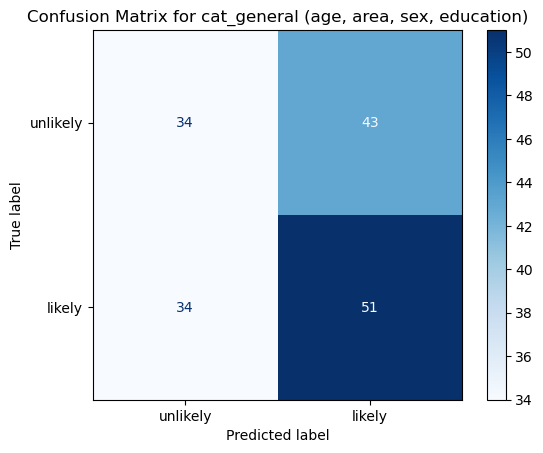

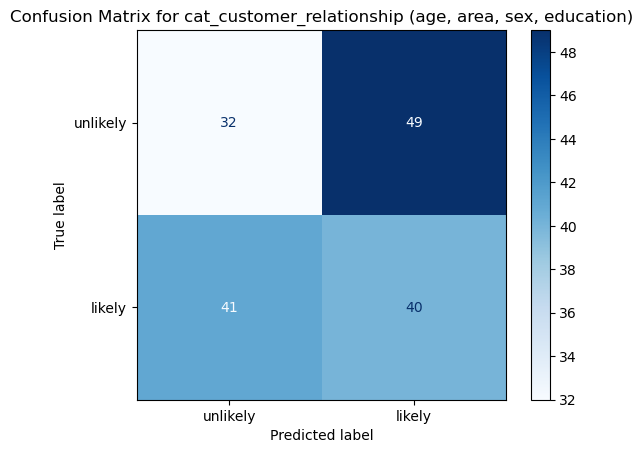

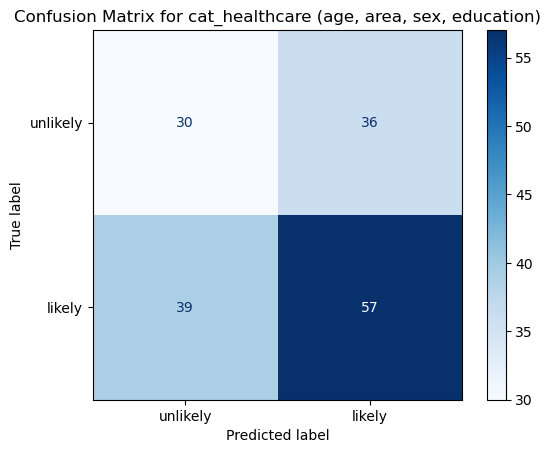

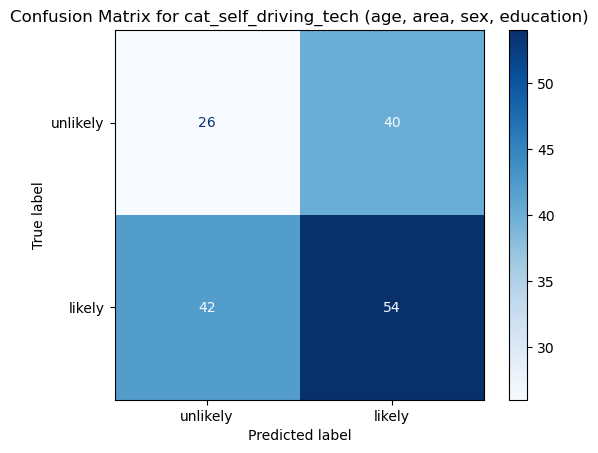

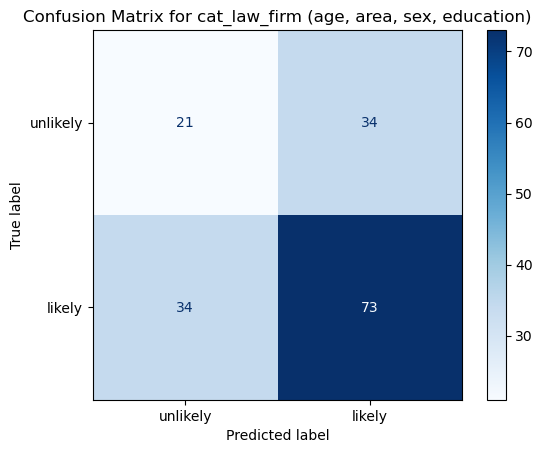

In [ ]:
for column_name in ["cat_general", "cat_customer_relationship", "cat_healthcare", "cat_self_driving_tech", "cat_law_firm"]:
    cm_score_calculate(column_name, 4)

In [ ]:
!pip freeze

aiobotocore @ file:///C:/b/abs_74o47svlua/croot/aiobotocore_1680004300264/work
aiofiles @ file:///C:/b/abs_9ex6mi6b56/croot/aiofiles_1683773603390/work
aiohttp @ file:///C:/ci_311/aiohttp_1676432932774/work
aioitertools @ file:///tmp/build/80754af9/aioitertools_1607109665762/work
aiosignal @ file:///tmp/build/80754af9/aiosignal_1637843061372/work
aiosqlite @ file:///C:/b/abs_9djc_0pyi3/croot/aiosqlite_1683773915844/work
alabaster @ file:///home/ktietz/src/ci/alabaster_1611921544520/work
altair==5.2.0
anaconda-anon-usage @ file:///C:/b/abs_4cqo3nmgh0/croot/anaconda-anon-usage_1694468596737/work
anaconda-catalogs @ file:///C:/b/abs_8btyy0o8s8/croot/anaconda-catalogs_1685727315626/work
anaconda-client==1.12.0
anaconda-navigator==2.4.3
anaconda-project @ file:///C:/ci_311/anaconda-project_1676458365912/work
anyio @ file:///C:/ci_311/anyio_1676425491996/work/dist
appdirs==1.4.4
argon2-cffi @ file:///opt/conda/conda-bld/argon2-cffi_1645000214183/work
argon2-cffi-bindings @ file:///C:/ci_311/